In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


In [2]:
df = pd.read_csv("cleanData1.csv")

In [3]:
df['INSPECTION DATE'] = pd.to_datetime(df['INSPECTION DATE'])
df['YEAR']=df['INSPECTION DATE'].dt.year
df['MONTH']=df['INSPECTION DATE'].dt.month
df['PERIOD']=df['INSPECTION DATE']

In [4]:
df.columns

Index(['Unnamed: 0', 'CAMIS', 'DBA', 'BORO', 'CUISINE DESCRIPTION',
       'INSPECTION DATE', 'SCORE', 'GRADE', 'INSPECTION TYPE', 'Latitude',
       'Longitude', 'geometry', 'FoodDOSite_Within_300m', 'SubwayWithin_300m',
       'BBL', 'Rodent_Freq2021', 'CT2020', 'NTAName', 'NTA2020', 'CDTA2020',
       'CDTANAME', 'RatioIncome', 'Population', 'mobile', 'citibike', 'sr311',
       'subway', 'taxi', 'twitter', 'working', 'residential', 'VIOLATION CODE',
       'YEAR', 'MONTH', 'PERIOD'],
      dtype='object')

In [172]:
df

,Unnamed: 0,CAMIS,DBA,BORO,CUISINE DESCRIPTION,INSPECTION DATE,SCORE,GRADE,INSPECTION TYPE,Latitude,...,citibike,sr311,subway,taxi,twitter,working,residential,VIOLATION CODE,YEAR,MONTH
0,0,50121030,Popeye's,Brooklyn,Chicken,2022-07-05,7.0,A,Pre-permit (Operational) / Initial Inspection,40.687952,...,54137,511,6355066.0,237610,211,17994,14355,['02B'],2022,7
1,1,50041578,33,Brooklyn,Creole,2022-12-02,10.0,A,Cycle Inspection / Re-inspection,40.686884,...,54137,511,6355066.0,237610,211,17994,14355,"['06D', '04L', '04H']",2022,12
2,2,50082408,COFFEE PROJECT NY,Brooklyn,Coffee/Tea,2022-03-22,4.0,A,Cycle Inspection / Initial Inspection,40.687686,...,54137,511,6355066.0,237610,211,17994,14355,"['10B', '10F']",2022,3
3,3,50078845,TACOMBI FORT GREENE,Brooklyn,Soups/Salads/Sandwiches,2022-06-11,7.0,A,Cycle Inspection / Initial Inspection,40.686845,...,54137,511,6355066.0,237610,211,17994,14355,['02G'],2022,6
4,4,50073849,Hungry Ghost Coffee,Brooklyn,Coffee/Tea,2022-06-01,0.0,A,Cycle Inspection / Re-inspection,40.689857,...,54137,511,6355066.0,237610,211,17994,14355,"['10E', '04H', '04A', '06D']",2022,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20060,20060,41560421,GRASSY POINT BAR & GRILL,Queens,American,2022-05-31,12.0,A,Cycle Inspection / Initial Inspection,40.600131,...,0,57,20394.0,856,14,503,1071,"['06D', '10F', '06C']",2022,5
20061,20061,50073395,ALL AMERICAN BAGEL BARISTA II,Queens,Coffee/Tea,2022-05-02,12.0,A,Cycle Inspection / Initial Inspection,40.598641,...,0,57,20394.0,856,14,503,1071,"['10B', '08A', '04L']",2022,5
20062,20062,40988969,LORETTA'S PIZZA,Bronx,Pizza,2022-02-10,2.0,A,Cycle Inspection / Initial Inspection,40.835573,...,0,181,0.0,4225,31,336,3286,['10F'],2022,2
20063,20063,50039710,FOREST PARK SNACK BAR,Queens,American,2022-04-04,9.0,A,Cycle Inspection / Initial Inspection,40.696945,...,0,63,0.0,5520,154,356,394,"['04H', '10F']",2022,4


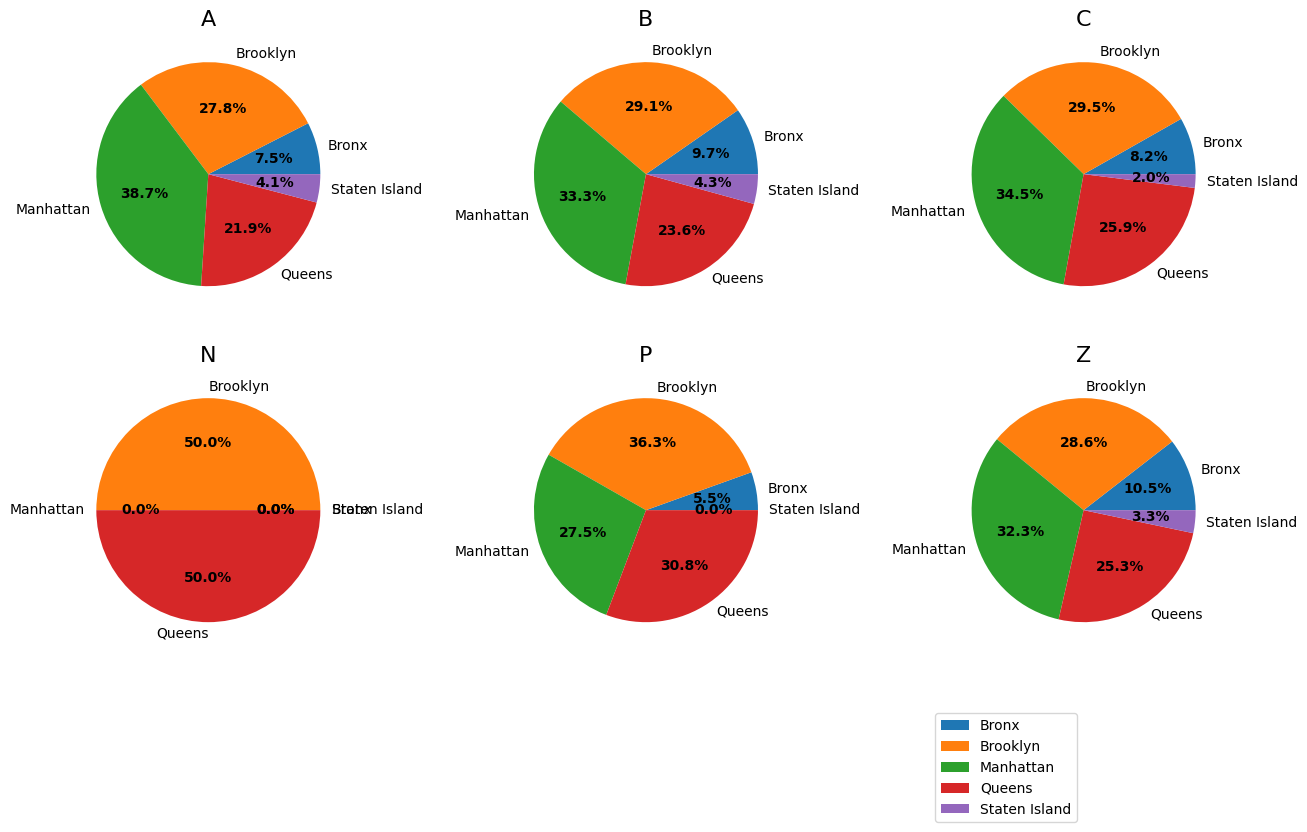

In [18]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

grades_by_borough = df.groupby("BORO")["GRADE"].value_counts().unstack().fillna(0)

fig, axes = plt.subplots(nrows=2, ncols=len(grades_by_borough.columns)//2, figsize=(16, 8), subplot_kw={"aspect": "equal"})
axes = axes.flat


for i, grade in enumerate(grades_by_borough.columns):
    _, _, autotexts = axes[i].pie(grades_by_borough[grade], labels=grades_by_borough.index, autopct="%1.1f%%", textprops={"fontsize": 10})
    plt.setp(autotexts, weight="bold")
    axes[i].set_title(grade, fontsize=16)

plt.legend( bbox_to_anchor=(0.5, -0.2))

plt.show()



In [5]:
df_historico = pd.read_csv("df_hist.csv")

In [7]:
df_historico['INSPECTION DATE'] = pd.to_datetime(df_historico['INSPECTION DATE'])
df_historico['YEAR']=df_historico['INSPECTION DATE'].dt.year
df_historico['MONTH']=df_historico['INSPECTION DATE'].dt.month

In [6]:
df_historico.columns

Index(['index', 'CAMIS', 'DBA', 'BORO', 'CUISINE DESCRIPTION',
       'INSPECTION DATE', 'ACTION', 'VIOLATION CODE', 'VIOLATION DESCRIPTION',
       'CRITICAL FLAG', 'SCORE', 'GRADE', 'INSPECTION TYPE', 'Latitude',
       'Longitude', 'Census Tract', 'BBL', 'NTA', 'geometry'],
      dtype='object')

In [351]:
violation_counts

,VIOLATION CODE,YEAR,SCORE
0,02A,2018,2
1,02A,2019,6
2,02A,2020,7
3,02A,2021,2
4,02A,2022,18
...,...,...,...
323,28-05,2023,27
324,28-06,2022,37
325,28-06,2023,34
326,28-07,2022,1


In [ ]:
import dash
from dash import html
from dash import dcc
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

districts = df['BORO'].unique()
years = [2022, 2023]
color_dict = {'A': 'BLUE', 'B': 'STEELBLUE', 'C': 'CYAN', 'P': 'ORANGE', 'Z': 'GOLD','N':'DARKSEAGREEN'}
all_cuisine = 'ALL'
df_new = df.groupby(["CUISINE DESCRIPTION", "YEAR","BORO"])["GRADE"].value_counts().reset_index(name="count")
all_cuisine = 'ALL'
options_cuisine = [{'label': all_cuisine, 'value': all_cuisine}] + [{'label': i, 'value': i} for i in df_new['CUISINE DESCRIPTION'].unique()]


app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("DATA VISUALIZATION OF NYC RESTAURANT INSPECTIONS"),
      
    
    html.Div(style={'width': '50%', 'display': 'inline-block'}),
    dcc.Graph(id="grade-by-borough-chart"),
    
    html.Div(
            [ dcc.Dropdown(id='year-dropdown', options=[{'label': i, 'value': i} for i in years], value=years[0], placeholder="Seleccionar año")],
        style={'width': '50%', 'display': 'inline-block'}),    
    dcc.Graph(id='bar-chart'),
    
    
    html.Div(style={'width': '50%', 'display': 'inline-block'}),
    dcc.Graph(id='heatmapbar', figure={
        'data': [go.Heatmap(
            x=df[df['INSPECTION DATE'].dt.year == df['INSPECTION DATE'].dt.year.max()]['INSPECTION DATE'],
            y=df[df['INSPECTION DATE'].dt.year == df['INSPECTION DATE'].dt.year.max()]['BORO'],
            z=df[df['INSPECTION DATE'].dt.year == df['INSPECTION DATE'].dt.year.max()]['SCORE'],
            colorscale='Viridis',
            zmin=0,
            zmax=100,
            colorbar=dict(
                title='SCORE'
            )
        )]
    }),
    
    html.Div(style={'width': '50%', 'display': 'inline-block'}),
    dcc.Graph(id='box-plot'),
    
    
    html.Div([
        dcc.Dropdown(id='district-dropdown', options=[{'label': i, 'value': i} for i in districts], value=districts[0], placeholder="Seleccionar borough"),
        dcc.Dropdown(id='top-n-dropdown', options=[{'label': i, 'value': i} for i in [25, 50, 75, 100]], value=25, placeholder="Seleccionar top N")
    ], style={'width': '50%', 'display': 'inline-block'}),
    dcc.Graph(id='restaurant-graph'),

    
    html.Div([
        dcc.Dropdown(id='cuisine-dropdown',
                     options=[{'label': 'ALL', 'value': 'ALL'}] + [{'label': i, 'value': i} for i in df['CUISINE DESCRIPTION'].unique()],
                     value='ALL', placeholder="CUISINE TYPE:")
    ], 
        
    
    style={'width': '50%', 'display': 'inline-block'}),
    dcc.Graph(id='grades-bar-plot'),
    
    html.Div([
        dcc.Dropdown(id='grade-dropdown', options=[{'label': i, 'value': i} for i in ['ALL', 'A', 'B', 'C', 'P', 'Z']], value='ALL', placeholder="Seleccionar nota GRADE")
    ], style={'width': '50%', 'display': 'inline-block'}),
    dcc.Graph(id='map'),
    
    html.Div(style={'width': '50%', 'display': 'inline-block'}),
    dcc.Graph(id='heatmap'),
    
    html.Div(style={'width': '50%', 'display': 'inline-block'}),
     dcc.Graph(id='inspection-graph')
    
])

####
@app.callback(
    dash.dependencies.Output("grade-by-borough-chart", "figure"),
    [dash.dependencies.Input("year-dropdown", "value")]
)
def update_grade_by_borough_chart(selected_year):
    data = df_historico[df_historico["YEAR"] <= selected_year]
    data = data.groupby(["BORO", "YEAR", "GRADE"]).size().reset_index(name="Count")

    fig = px.line(data, x="YEAR", y="Count", color="GRADE", facet_col="BORO", color_discrete_map=color_dict
                 ,title='LINE GRAPH OF NYC RESTAURANT INSPECTION SCORES BY GRADE FOR THE PAST 5 YEARS')

    return fig


@app.callback(
    dash.dependencies.Output('bar-chart', 'figure'),
    [dash.dependencies.Input('year-dropdown', 'value')])
def update_barchart(selected_year):
    filtered_df = df[df['YEAR'] == selected_year]
    group_df = filtered_df.groupby('BORO')['GRADE'].value_counts().unstack()
    fig = px.bar(group_df, x=group_df.index, y=['A', 'B', 'C'], barmode='group')
    fig.update_layout(title='INSPECTION GRADE BY BOROUGH',
                      xaxis_title='BOROUGH',
                      yaxis_title='# OF RESTAURANTS',
                      legend_title='GRADES'
                     )
    return fig


@app.callback(
    dd.Output('heatmapbar', 'figure'),
    [dd.Input('year-dropdown', 'value')]
)
def update_heatmap_bar(year):
    filtered_df = df[df['INSPECTION DATE'].dt.year == year]
    heatmapbar = go.Heatmap(
        x=filtered_df['INSPECTION DATE'],
        y=filtered_df['BORO'],
        z=filtered_df['SCORE'],
        colorscale='Viridis',
        zmin=0,
        zmax=100,
        colorbar=dict(title='SCORE')
    )
    layout = go.Layout(
        xaxis=dict(title='INSPECTION DATE'),
        yaxis=dict(title='BOROUGH'),
        title= f'HEATMAP OF NYC RESTAURANT INSPECTION RESULTS IN {year}',
        height=500,
        margin=dict(l=100, r=100, t=100, b=100),
    )
    return {'data': [heatmapbar], 'layout': layout}

#####
@app.callback(
    Output('box-plot', 'figure'),
    Input('year-dropdown', 'value')
)
def update_box_plot(selected_year):
    filtered_df = df[df['YEAR'] == selected_year]
    fig = px.box(filtered_df, y='SCORE', x='BORO', color='BORO',
                 title=f'BOXPLOT OF RESTAURANT INSPECTION SCORES IN {selected_year}')
    return fig

@app.callback(
    Output(component_id='restaurant-graph', component_property='figure'),
    Input(component_id='district-dropdown', component_property='value'),
    Input(component_id='top-n-dropdown', component_property='value'),
    Input(component_id='year-dropdown', component_property='value')
)
def update_plot(selected_district, top_n, selected_year):
    filtered_df = df[(df['BORO'] == selected_district) & (df['YEAR'] == selected_year)]
    count_by_cuisine = filtered_df.groupby('CUISINE DESCRIPTION').size().reset_index(name='TOTAL')
    count_by_cuisine = count_by_cuisine.sort_values(by='TOTAL', ascending=False)

    fig = px.bar(count_by_cuisine.head(top_n), x='TOTAL', y='CUISINE DESCRIPTION', orientation='h')

    fig.update_layout(
        title_text=f'TOP {top_n} TYPES OF RESTAURANTS INSPECTED IN {selected_district} IN {selected_year}',
        xaxis_title='# OF RESTAURANTS',
        yaxis_title='RESTAURANT TYPE',
        height=800+(4*top_n)
    )

    return fig

@app.callback(
    dash.dependencies.Output('grades-bar-plot', 'figure'),
    [dash.dependencies.Input('cuisine-dropdown', 'value'),
     dash.dependencies.Input('year-dropdown', 'value'),
     dash.dependencies.Input('district-dropdown', 'value')
    ])
def update_graph(cuisine, selected_year, selected_district):
    if cuisine == all_cuisine:
        filtered_df = df_new[(df_new['YEAR'] == selected_year) & (df_new['BORO'] == selected_district)]
        title = f"GRADES FOR ALL TYPES OF RESTAURANTS IN {selected_district} IN {selected_year}"
    else:
        filtered_df = df_new[(df_new['CUISINE DESCRIPTION'] == cuisine) & (df_new['YEAR'] == selected_year) & (df_new['BORO'] == selected_district)]
        title = f"GRADES FOR THE RESTAURANT TYPE: {cuisine} IN {selected_district} IN {selected_year}"
    fig = px.bar(filtered_df, 
                 x="GRADE", 
                 y="count", 
                 color="GRADE", 
                 color_discrete_map=color_dict,
                 category_orders={"GRADE": ["A", "B", "C"]},
                 hover_data={"CUISINE DESCRIPTION": True},
                 title=title,
                 labels={"count": "# OF RESTAURANTS", "GRADE": "GRADES"}
                )
    fig.update_layout(font=dict(size=14))
    return fig


@app.callback(
    dash.dependencies.Output('map', 'figure'),
    [dash.dependencies.Input('district-dropdown', 'value'),
     dash.dependencies.Input('year-dropdown', 'value'),
     dash.dependencies.Input('grade-dropdown', 'value')])
def update_map(district, year, grade):
    if grade == 'ALL':
        filtered_df = df[(df['BORO'] == district) & (df['YEAR'] == year)]
    else:
        filtered_df = df[(df['BORO'] == district) & (df['YEAR'] == year) & (df['GRADE'] == grade)]

    trace = go.Scattermapbox(
    lat=filtered_df['Latitude'],
    lon=filtered_df['Longitude'],
    mode='markers',
    marker=dict(
        size=9,
        color=[color_dict[grade] for grade in filtered_df['GRADE']],
    ),
    text=filtered_df['DBA'] + ', GRADE: ' + filtered_df['GRADE'].astype(str)
    )

    
    layout = go.Layout(
        title = f"SPATIAL VISUALIZATION OF RESTAURANT INSPECTION GRADES IN {district} IN {year}",
        autosize=True,
        hovermode='closest',
        mapbox=dict(
            accesstoken='pk.eyJ1IjoibWFsdWNvcm5lam8iLCJhIjoiY2xoM21xZDU4MTFtMzNkbzE3OWdpdnZpaSJ9.WHYYCliXrVj37d7uNVClLw',
            bearing=0,
            center=dict(
                lat=40.7128,
                lon=-74.0060
            ),
            pitch=0,
            zoom=10
        ),
        
            margin=dict(l=0, r=0, t=30, b=0),
            height=600,
            yaxis=dict(title='Latitud'),
            xaxis=dict(title='Longitud'),
            font=dict(color="#CCCCCC"),
            paper_bgcolor="#222222",
            plot_bgcolor="#222222"
        
    )
    return {'data': [trace], 'layout': layout}

@app.callback(
    dash.dependencies.Output('heatmap', 'figure'),
    [dash.dependencies.Input('district-dropdown', 'value'),
     dash.dependencies.Input('year-dropdown', 'value'),
    dash.dependencies.Input('grade-dropdown', 'value')
    ])
def update_heatmap(selected_boro, selected_year,grade ):
    
    if grade == 'ALL':
        filtered_df = df[(df['BORO'] == selected_boro) & (df['YEAR'] == selected_year)]
    else:
        filtered_df = df[(df['BORO'] == selected_boro) & (df['YEAR'] == selected_year) & (df['GRADE'] == grade)]
    fig = {
        'data': [go.Scattermapbox(
            lat=filtered_df['Latitude'],
            lon=filtered_df['Longitude'],
            mode='markers',
            marker=go.scattermapbox.Marker(
                size=9,
                color=filtered_df['SCORE'],
                colorscale='Jet',
                cmin=0,
                cmax=100,
                colorbar=dict(
                    title='SCORE'
                )
            ),
            text=[f"Restaurante: {name}, SCORE: {score}" for name, score, grade in zip(filtered_df['DBA'], filtered_df['SCORE'], filtered_df['GRADE'])]
        )],
        'layout': go.Layout(
            title = f"SPATIAL VISUALIZATION OF RESTAURANT INSPECTION SCORES IN {selected_boro} IN {selected_year}",
            autosize=True,
            hovermode='closest',
            mapbox=dict(
                accesstoken='pk.eyJ1IjoibWFsdWNvcm5lam8iLCJhIjoiY2xoM21xZDU4MTFtMzNkbzE3OWdpdnZpaSJ9.WHYYCliXrVj37d7uNVClLw',
                bearing=0,
                center=dict(
                    lat=40.7128,
                    lon=-74.0060
                ),
                pitch=0,
                zoom=10
            ),
            margin=dict(l=0, r=0, t=30, b=0),
            height=600,
            yaxis=dict(title='Latitud'),
            xaxis=dict(title='Longitud'),
            font=dict(color="#CCCCCC"),
            paper_bgcolor="#222222",
            plot_bgcolor="#222222"
        )
    }
    return fig

@app.callback(
    dash.dependencies.Output('inspection-graph', 'figure'),
    [dash.dependencies.Input('year-dropdown', 'value')]
)
def update_figure(selected_year):
    filtered_df_historico = df_historico[df_historico['YEAR'] == selected_year]
    fig = px.scatter(filtered_df_historico, x='VIOLATION CODE', y='SCORE', color='VIOLATION CODE'
        ,                 title=f'RELATIONSHIP BETWEEN VIOLATION CODES AND INSPECTION SCORES IN {selected_year}'
)
    return fig

if __name__ == '__main__':
    app.run_server(port=8000)

Dash is running on http://127.0.0.1:8000/

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8000
Press CTRL+C to quit
127.0.0.1 - - [03/May/2023 10:54:48] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/May/2023 10:54:49] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [03/May/2023 10:54:49] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [03/May/2023 10:54:49] "GET /_favicon.ico?v=2.9.3 HTTP/1.1" 200 -
127.0.0.1 - - [03/May/2023 10:54:49] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
127.0.0.1 - - [03/May/2023 10:54:49] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 304 -
127.0.0.1 - - [03/May/2023 10:54:49] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -
127.0.0.1 - - [03/May/2023 10:54:49] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [03/May/2023 10:54:49] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [03/May/2023 10:54:49] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [03/May/2023 10:54:49] "POST /_dash-update-component HTTP/1.1" 200